In [1]:
from chem import script9
import numpy as np
import matplotlib.pyplot as plt

Example 1: Pure Diffusion


/Users/zuoming/Library/CloudStorage/OneDrive-CornellUniversity/Chem7870/Computational Chemistry/pde-solvers/src/chem/script9.py:281: RuntimeWarning: divide by zero encountered in matmul
  return inv(A) @ B
/Users/zuoming/Library/CloudStorage/OneDrive-CornellUniversity/Chem7870/Computational Chemistry/pde-solvers/src/chem/script9.py:281: RuntimeWarning: overflow encountered in matmul
  return inv(A) @ B
/Users/zuoming/Library/CloudStorage/OneDrive-CornellUniversity/Chem7870/Computational Chemistry/pde-solvers/src/chem/script9.py:281: RuntimeWarning: invalid value encountered in matmul
  return inv(A) @ B
/Users/zuoming/Library/CloudStorage/OneDrive-CornellUniversity/Chem7870/Computational Chemistry/pde-solvers/src/chem/script9.py:123: RuntimeWarning: divide by zero encountered in matmul
  u[i, :] = update_matrix @ u[i - 1, :]
/Users/zuoming/Library/CloudStorage/OneDrive-CornellUniversity/Chem7870/Computational Chemistry/pde-solvers/src/chem/script9.py:123: RuntimeWarning: overflow encou

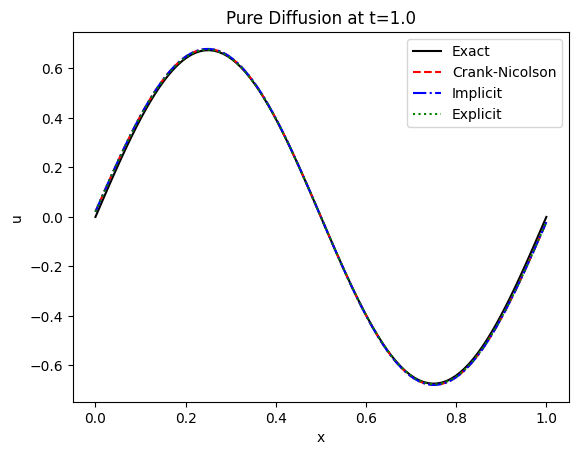

L2 Error Crank-Nicolson: 0.009574
L2 Error Implicit: 0.009774
L2 Error Explicit: 0.008688


In [2]:
# Example 1: Pure Diffusion
print("Example 1: Pure Diffusion")
x_0 = 0.0
x_N = 1.0
N_points = 100
D = 0.01
v = 0.0
reaction_rates = np.zeros(N_points)
dt_implicit = 0.01
dt_explicit = 0.001  # Smaller dt for explicit method stability
steps_implicit = 100  # t=1.0
steps_explicit = 1000  # t=1.0

x = np.linspace(x_0, x_N, N_points)
u_0 = np.sin(2 * np.pi * x)
t_final = 1.0
u_exact = np.exp(- (2 * np.pi)**2 * D * t_final) * np.sin(2 * np.pi * x)

solver_cn = script9.ReactionConvectionDiffusion(x_0, x_N, reaction_rates, D, v, dt_implicit)
solver_imp = script9.ReactionConvectionDiffusion(x_0, x_N, reaction_rates, D, v, dt_implicit)
solver_exp = script9.ReactionConvectionDiffusion(x_0, x_N, reaction_rates, D, v, dt_explicit)

u_cn = solver_cn.integrate_pde(u_0, steps_implicit, "crank_nicolson")[-1, :]
u_imp = solver_imp.integrate_pde(u_0, steps_implicit, "implicit")[-1, :]
u_exp = solver_exp.integrate_pde(u_0, steps_explicit, "explicit")[-1, :]

plt.plot(x, u_exact, 'k-', label='Exact')
plt.plot(x, u_cn, 'r--', label='Crank-Nicolson')
plt.plot(x, u_imp, 'b-.', label='Implicit')
plt.plot(x, u_exp, 'g:', label='Explicit')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Pure Diffusion at t=1.0')
plt.show()

dx = x[1] - x[0]
error_cn = np.sqrt(np.sum((u_cn - u_exact)**2) * dx)
error_imp = np.sqrt(np.sum((u_imp - u_exact)**2) * dx)
error_exp = np.sqrt(np.sum((u_exp - u_exact)**2) * dx)
print(f"L2 Error Crank-Nicolson: {error_cn:.6f}")
print(f"L2 Error Implicit: {error_imp:.6f}")
print(f"L2 Error Explicit: {error_exp:.6f}")


Example 2: Diffusion with Reaction


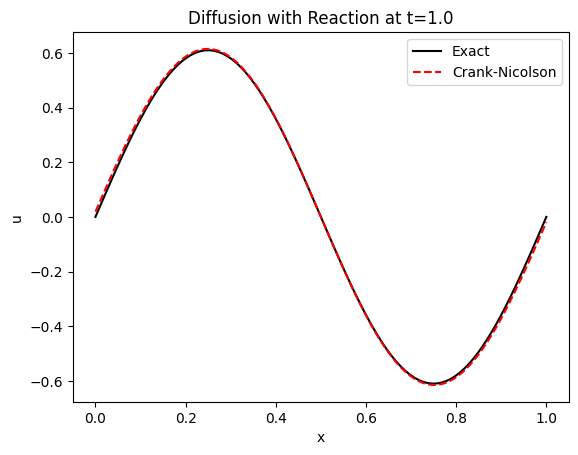

L2 Error with Reaction: 0.008928


In [3]:
# Example 2: Diffusion with Reaction
print("\nExample 2: Diffusion with Reaction")
k = -0.1
reaction_rates = np.full(N_points, k)
u_exact_reaction = np.exp(k * t_final) * np.exp(- (2 * np.pi)**2 * D * t_final) * np.sin(2 * np.pi * x)

solver_reaction = script9.ReactionConvectionDiffusion(x_0, x_N, reaction_rates, D, v, dt_implicit)
u_reaction = solver_reaction.integrate_pde(u_0, steps_implicit, "crank_nicolson")[-1, :]

plt.plot(x, u_exact_reaction, 'k-', label='Exact')
plt.plot(x, u_reaction, 'r--', label='Crank-Nicolson')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Diffusion with Reaction at t=1.0')
plt.show()

error_reaction = np.sqrt(np.sum((u_reaction - u_exact_reaction)**2) * dx)
print(f"L2 Error with Reaction: {error_reaction:.6f}")


Example 3: Convection-Diffusion


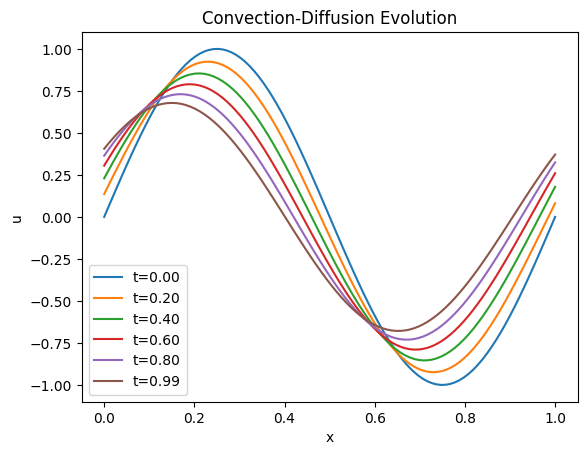

In [4]:
# Example 3: Convection-Diffusion
print("\nExample 3: Convection-Diffusion")
v = 0.1
reaction_rates = np.zeros(N_points)
solver_conv = script9.ReactionConvectionDiffusion(x_0, x_N, reaction_rates, D, v, dt_implicit)
u_conv = solver_conv.integrate_pde(u_0, steps_implicit, "crank_nicolson")

times = [0, 20, 40, 60, 80, 99]
for i in times:
    plt.plot(x, u_conv[i], label=f't={i*dt_implicit:.2f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Convection-Diffusion Evolution')
plt.show()


Example 4: Full Reaction-Convection-Diffusion


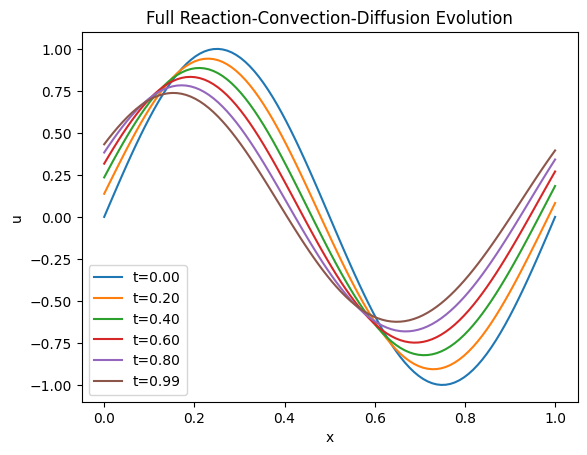

In [5]:
# Example 4: Full Reaction-Convection-Diffusion
print("\nExample 4: Full Reaction-Convection-Diffusion")
reaction_rates = 0.1 * np.sin(2 * np.pi * x)
v = 0.1
D = 0.01
solver_full = script9.ReactionConvectionDiffusion(x_0, x_N, reaction_rates, D, v, dt_implicit)
u_full = solver_full.integrate_pde(u_0, steps_implicit, "crank_nicolson")

for i in times:
    plt.plot(x, u_full[i], label=f't={i*dt_implicit:.2f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Full Reaction-Convection-Diffusion Evolution')
plt.show()